In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import normalize
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
 !pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tf.__version__

'2.12.0'

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('./drive/MyDrive/datas/0524_data.csv',
                 names = ["image_name",
                          "left_ear_shoulder_distance",
                          "nose_shoulder_distance",
                          "right_ear_shoulder_distance",
                          "center_shoulder",
                          "shoulder_slope",
                          "label"])
print(df)

                          image_name  left_ear_shoulder_distance  \
0     ./0524_data_zero/image_100.jpg                    1.181818   
1     ./0524_data_zero/image_101.jpg                    1.181818   
2     ./0524_data_zero/image_102.jpg                    1.250000   
3     ./0524_data_zero/image_103.jpg                    1.181818   
4     ./0524_data_zero/image_104.jpg                    1.300000   
...                              ...                         ...   
1193  ./0515_data_one/image_1969.jpg                    0.892857   
1194  ./0515_data_one/image_1209.jpg                    1.000000   
1195  ./0515_data_one/image_1213.jpg                    1.000000   
1196  ./0515_data_one/image_1232.jpg                    0.928571   
1197  ./0515_data_one/image_1243.jpg                    0.961538   

      nose_shoulder_distance  right_ear_shoulder_distance  center_shoulder  \
0                   1.090909                     1.181818         0.181818   
1                   1.09090

In [ ]:
print(df.values[:])

[['./0524_data_zero/image_100.jpg' 1.181818182 1.090909091 ...
  0.181818182 0.0 0]
 ['./0524_data_zero/image_101.jpg' 1.181818182 1.090909091 ...
  0.181818182 0.0 0]
 ['./0524_data_zero/image_102.jpg' 1.25 1.15 ... 0.1 0.0526315789 0]
 ...
 ['./0515_data_one/image_1213.jpg' 1.0 0.692307692 ... 0.153846154 0.0 1]
 ['./0515_data_one/image_1232.jpg' 0.928571429 0.714285714 ...
  0.214285714 0.0 1]
 ['./0515_data_one/image_1243.jpg' 0.961538462 0.730769231 ...
  0.153846154 0.0454545455 1]]


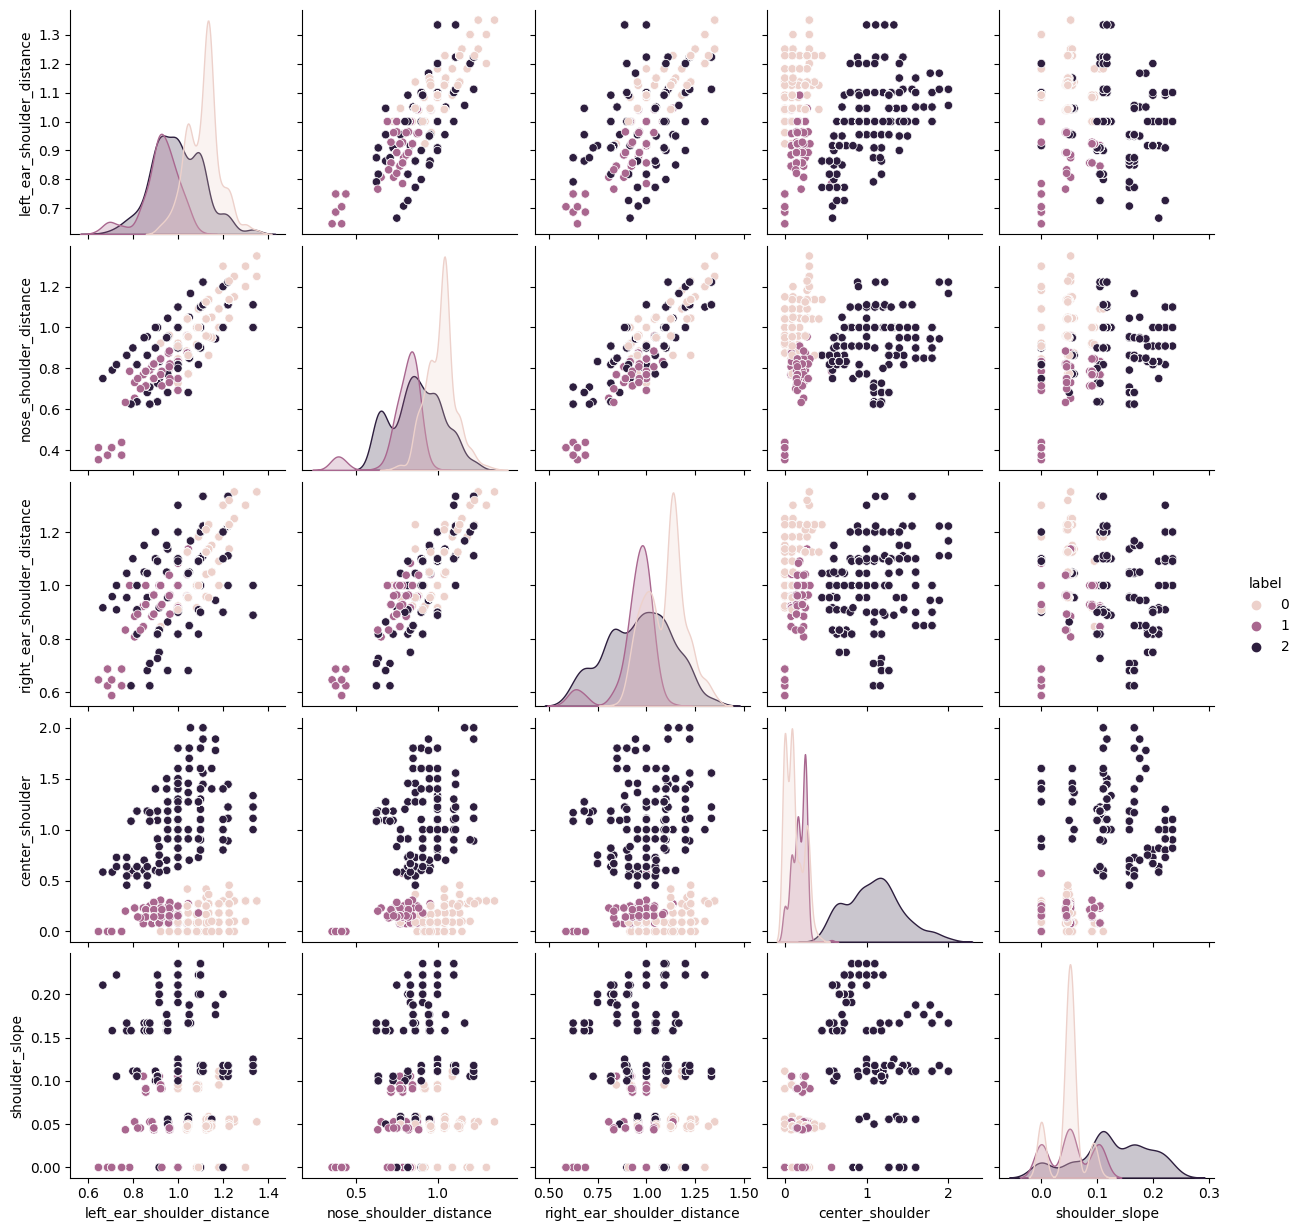

In [ ]:
sns.pairplot(df,hue="label")
plt.show()

In [4]:
dataset = df.values
X = dataset[:, 1:6].astype(float)
Y = dataset[:, 6].astype(float)

In [5]:
X = normalize(X, axis = 0, norm='max')

# Y 원핫 인코딩
Y_encoded=np_utils.to_categorical(Y)

In [ ]:
print(X)
print(Y_encoded)

[[0.87542088 0.80808081 0.87542088 0.09090909 0.        ]
 [0.87542088 0.80808081 0.87542088 0.09090909 0.        ]
 [0.92592593 0.85185185 0.92592593 0.05       0.22368421]
 ...
 [0.74074074 0.51282051 0.74074074 0.07692308 0.        ]
 [0.68783069 0.52910053 0.68783069 0.10714286 0.        ]
 [0.71225071 0.54131054 0.71225071 0.07692308 0.19318182]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y_encoded,
                                                    random_state = 0,
                                                    train_size = 0.7,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    stratify = Y_encoded)

print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(X_train.shape)
print(y_train.shape)

[[0.77441077 0.57239057 0.70707071 0.45454545 0.23611111]
 [0.96296296 0.88888889 0.96296296 0.15       0.        ]
 [0.77441077 0.70707071 0.70707071 0.04545455 0.20238095]
 ...
 [0.63492063 0.58201058 0.68783069 0.07142857 0.38636364]
 [0.81481481 0.81481481 0.88888889 0.6        0.94444444]
 [0.56790123 0.4691358  0.61728395 0.1        0.18478261]]
[[0.67901235 0.61728395 0.74074074 0.125      0.44736842]
 [0.70987654 0.64814815 0.70987654 0.125      0.22368421]
 [0.80246914 0.67901235 0.74074074 0.04166667 0.4047619 ]
 ...
 [0.84175084 0.77441077 0.84175084 0.         0.23611111]
 [0.70707071 0.50505051 0.50505051 0.59090909 0.67105263]
 [0.87542088 0.80808081 0.87542088 0.09090909 0.        ]]
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
(838, 5)
(838, 3)


In [ ]:
model = Sequential([
  Dense(256, input_dim=5),
  Activation('relu'),
  Dropout(0.4),
  Dense(128),
  Activation('relu'),
  Dropout(0.4),
  Dense(64),
  Activation('relu'),
  Dropout(0.5),
  Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/500
9/9 [==============================] - 2s 46ms/step - loss: 1.0640 - accuracy: 0.4487 - val_loss: 0.9769 - val_accuracy: 0.7389
Epoch 2/500
9/9 [==============================] - 0s 13ms/step - loss: 0.9511 - accuracy: 0.6110 - val_loss: 0.8283 - val_accuracy: 0.7694
Epoch 3/500
9/9 [==============================] - 0s 13ms/step - loss: 0.8271 - accuracy: 0.6862 - val_loss: 0.6489 - val_accuracy: 0.7694
Epoch 4/500
9/9 [==============================] - 0s 13ms/step - loss: 0.6685 - accuracy: 0.7434 - val_loss: 0.5086 - val_accuracy: 0.7694
Epoch 5/500
9/9 [==============================] - 0s 11ms/step - loss: 0.5490 - accuracy: 0.7625 - val_loss: 0.4283 - val_accuracy: 0.7694
Epoch 6/500
9/9 [==============================] - 0s 15ms/step - loss: 0.4875 - accuracy: 0.7745 - val_loss: 0.3855 - val_accuracy: 0.7778
Epoch 7/500
9/9 [==============================] - 0s 11ms/step - loss: 0.4185 - accuracy: 0.8007 - val_loss: 0.3583 - val_accuracy: 0.7861
Epoch 8/500
9/9 [===

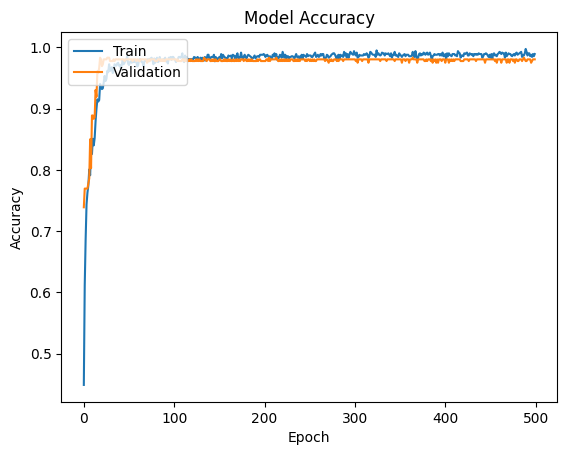

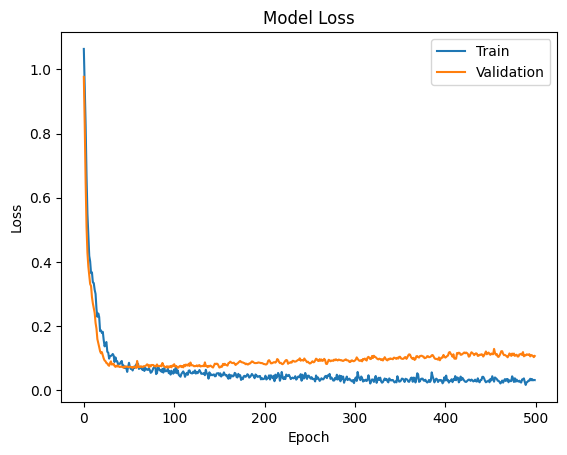

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=100)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9806


[0.10666763782501221, 0.980555534362793]

In [ ]:
model.save('./drive/MyDrive/models/0524_model.h5')

In [ ]:
tfjs.converters.save_keras_model(model, './drive/MyDrive/tfjs_models/0524_model')